<a href="https://colab.research.google.com/github/adityasankalp/Decision_Trees/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
moon = datasets.make_moons(n_samples=10000, noise=0.4)

In [ ]:
X,Y = moon

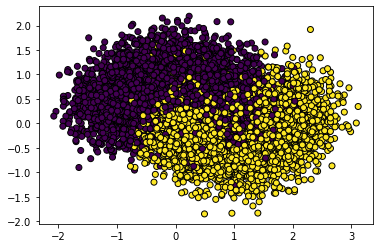

In [36]:
plt.scatter(X[:,0],X[:,1],c=Y, 
               edgecolors='k')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 20)

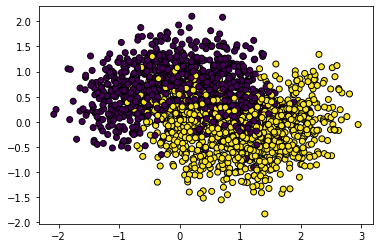

In [56]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test, 
               edgecolors='k')
plt.show()

In [70]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' :[2,3,4,5],
              'max_leaf_nodes':[3,4,5,6,7,8],
              }
clf1 = GridSearchCV(DecisionTreeClassifier(),param_grid = parameters)
clf1.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5],
                       

In [86]:
clf1.cv_results_["mean_test_score"]
clf1.best_estimator_
#clf1.best_score_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
score = clf1.score(X_test,Y_test)
print(score)

0.856


In [163]:
clf2 = DecisionTreeClassifier(max_depth = 2,max_leaf_nodes=4)
clf2.fit(X_train,Y_train)
clf2.score(X_test,Y_test)

0.856

[Text(167.4, 181.2, 'X[1] <= 0.229\ngini = 0.5\nsamples = 8000\nvalue = [4027, 3973]'),
 Text(83.7, 108.72, 'X[0] <= -0.512\ngini = 0.336\nsamples = 3887\nvalue = [831, 3056]'),
 Text(41.85, 36.23999999999998, 'gini = 0.166\nsamples = 373\nvalue = [339, 34]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.241\nsamples = 3514\nvalue = [492, 3022]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 1.43\ngini = 0.346\nsamples = 4113\nvalue = [3196, 917]'),
 Text(209.25, 36.23999999999998, 'gini = 0.245\nsamples = 3669\nvalue = [3145, 524]'),
 Text(292.95, 36.23999999999998, 'gini = 0.203\nsamples = 444\nvalue = [51, 393]')]

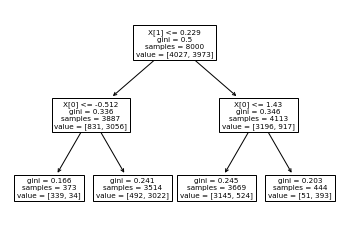

In [88]:
from sklearn.tree import plot_tree
plot_tree(clf2)

In [167]:
# checking random trees
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits = 1000,train_size = 100)
rs.get_n_splits(X_train)
clf3 = DecisionTreeClassifier(max_depth = 2,max_leaf_nodes=4)
y1 = np.zeros((1000,2000))
i = 0
for x_index in rs.split(X_train):
  clf3.fit(X_train[x_index[0]],Y_train[x_index[0]])
  y_pred = clf3.predict(X_test)
  y1[i] = y_pred
  i = i+1
  #print(clf3.score(X_test,Y_test))

In [140]:
from scipy import stats
a = np.array([[6, 8, 3, 0],
              [8, 1, 5, 7],
              [8, 1, 8, 9],
              [5, 3, 0, 5],
              [4, 7, 5, 9]])
stats.mode(a,axis = 0)

ModeResult(mode=array([[8, 1, 5, 9]]), count=array([[2, 2, 2, 2]]))

In [168]:
y2 = stats.mode(y1,axis =0).mode

In [150]:
Y_test.shape

(2000,)

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y2.T,Y_test)


0.853

In [170]:
y_chk = clf2.predict(X_test)
accuracy_score(y_chk,Y_test)

0.856